<a href="https://colab.research.google.com/github/mahdiskj/DT_RFclassifier/blob/main/decision_tree_classification_GITHUB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classification

## Importing the libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [13]:
dataset = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#Encoding categorical data

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# encoder : type of transformation | OneHotEncoder: the type of encoding | [0]: the index of the column we want to perform OneHotEncoding
# passthrough : wewant to keep the values that aren't transformed, unless they are deleted
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# the machine learning method expects the matrix of features as a numpy array:
X = np.array(ct.fit_transform(X))

## Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Decision Tree Classification model on the Training set

In [17]:
from sklearn.tree import DecisionTreeClassifier
# 'criterion' : the function that measures the quality of the leaves
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Predicting the Test set results

In [18]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix

In [19]:
# Function to plot the confusion Matrix
import itertools
class_names=np.array(['0','1','2','3','4','5'])
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy: 81.60 %


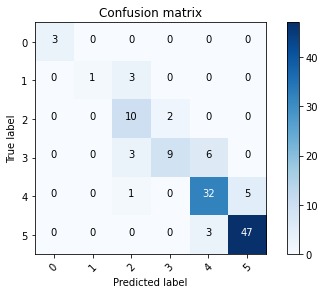

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,class_names)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f} %".format(accuracy*100))